# Doctor's Consultation Fees Prediction

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import Train Data
df_train=pd.read_excel("Doctor_fee_Train.xlsx")
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#Check null values
df_train.isnull().sum()
#NaN values found 

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
#Check feature data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
#Import Test Data
df_test=pd.read_excel("Doctor_fee_Test.xlsx")
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [7]:
#Check null values in test dataset
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [8]:
#Check datatypes of features in test data type.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [9]:
#Check data 
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# Feature engineering

In [10]:
#Combining Train & Test dataset along a column
df_train["ref"]="train"
df_test["ref"]="test"
df=pd.concat([df_train,df_test])
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ref
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [11]:
#Reset index
df.reset_index(drop=True,inplace=True)

In [12]:
#Check data
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ref
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [13]:
#Check null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
ref                      0
dtype: int64

In [14]:
#1. Experience
#Feature "experience" can be converted to numeric by extracting integer data
df["Experience"].str.split().str[0]

0       24
1       12
2        9
3       12
4       20
        ..
7943    10
7944     4
7945     9
7946    12
7947     8
Name: Experience, Length: 7948, dtype: object

In [15]:
#Assign to the column and convert to int dtype
df["Experience"]=df["Experience"].str.split().str[0]
df["Experience"]=df["Experience"].astype(int)

In [16]:
#Check column experience
df["Experience"]

0       24
1       12
2        9
3       12
4       20
        ..
7943    10
7944     4
7945     9
7946    12
7947     8
Name: Experience, Length: 7948, dtype: int32

In [17]:
#2.Rating
#Convert column rating into "int dtype"
df["Rating"]=df["Rating"].str.strip("%")
df["Rating"]=df["Rating"].astype(float)

In [18]:
df["Rating"]

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
7943      NaN
7944      NaN
7945      NaN
7946     98.0
7947      NaN
Name: Rating, Length: 7948, dtype: float64

In [19]:
#Lets replace null values in rating by 0.
df["Rating"].fillna(0,inplace=True)

In [20]:
#Check null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
ref                      0
dtype: int64

In [21]:
#Place
#Fill the null values in "place" as unknown then divide the place into [area & city] 
df["Place"].fillna("unknown,unknown",inplace=True)

In [22]:
#Divide feature Place into Area,City
df["Area"]=df["Place"].str.split(",").str[0]
df["City"]=df["Place"].str.split(",").str[1]

In [23]:
#Drop column "Place" as it is already divided into Area & City
df.drop("Place",axis=1,inplace=True)
df.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,ref,Area,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,Whitefield,Bangalore


In [24]:
#Check unique value in "Area" & "City"
print(df["Area"].nunique())
print(df["City"].nunique())

938
10


In [25]:
df["Area"].unique()

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani', 'Thousand Lights', 'Somajiguda', 'Coimbatore Racecourse',
       'Jubilee Hills', 'Kondli', 'Saroor Nagar', 'Tambaram West',
       'Purasawakkam', 'KPHB', 'HSR Layout', 'Pollachi',
       'Vasundhra Enclave', 'Chembur', 'Thammanam', 'Andheri', 'Pattom',
       'Kukatpally', 'Vadavalli', 'Defence Colony', 'Banjara Hills',
       'Sion West', 'CR Park', 'Mogappair East', 'IP Extension',
       'Safdarjung Enclave', 'New Friends Colony', 'Borivali West',
       'Saket', 'Malad', 'Hyder Nagar', 'Dahisar West', 'RT Nagar',
       'Powai', 'Basheerbagh', 'Musheerabad', 'AS Rao Nagar', 'Madhapur',
       'Gandhinagar', 'Chetpet', 'Vileparle East', 'Yelahanka New Town',
       'Kodambakkam', 'Malleswaram', 'Pallikaranai', 'Nallakunta',
       'Paschim Vihar', 'Meera Bagh', 'Chattarpur', 'Andheri West',
       'Himayat Nagar', 'Adambakka

In [26]:
print(df["City"].unique())

[' Ernakulam' ' Bangalore' ' Chennai' ' Delhi' ' Hyderabad' ' Coimbatore'
 ' Mumbai' ' Thiruvananthapuram' 'unknown' ' Sector 5' nan]


In [27]:
#Remove the spaces and special characters 
import re
df["City"]=df["City"].apply(lambda x:re.sub(' +',"",str(x)))
df["City"].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'unknown', 'Sector5',
       'nan'], dtype=object)

In [28]:
df[df["City"] == "Sector5"]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,ref,Area,City
2169,BDS,11,0.0,Dentist,NaN,250.0,train,Dwarka,Sector5


In [29]:
#Replace "Sector5" as "Delhi"
df["City"]=np.where(df["City"]=="Sector5","Delhi",df["City"])

In [30]:
#Check "nan" values in feature "City"
df[df["City"] == "nan"]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,ref,Area,City
3980,BDS,23,0.0,Dentist,NaN,250.0,train,e,nan


In [31]:
#Fill "Area" & "City" as unknown as valyes are missing
df["City"].loc[3980]="unknown"
df["Area"].loc[3980]="unknown"

In [32]:
df["City"].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'unknown'],
      dtype=object)

In [33]:
df[df["City"] == "unknown"]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,ref,Area,City
91,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
502,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
599,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
605,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
724,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
1002,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
1083,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
1210,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
2078,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown
2178,Get inspired by remarkable stories of people l...,0,0.0,Dermatologists,NaN,100.0,train,unknown,unknown


In [34]:
#Unknown values in "Area" & "City" cannot be extracted as no corresponding details available in "Miscelleneous_Info"
#In "Area" we will replace "unknown" by "Mode" & correspondingly fill unknown values in city
#Frequent value / Mode in "Area"
#As there are two mode, we will use top 5 area
df["Area"].value_counts()[0:5]

HSR Layout       97
Andheri West     97
Dwarka           94
Banjara Hills    85
Mulund West      81
Name: Area, dtype: int64

In [35]:
area_index=df[df["Area"] == "unknown"].index
area_index

Int64Index([  91,  502,  599,  605,  724, 1002, 1083, 1210, 2078, 2178, 2328,
            3099, 3228, 3418, 3443, 3744, 3804, 3980, 4004, 4758, 4823, 4847,
            5058, 5187, 5551, 5723, 6342, 7455, 7605, 7799, 7886, 7891],
           dtype='int64')

In [36]:
len(df["Area"])

7948

In [37]:
#Qualification
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
ref                      0
Area                     0
City                     0
dtype: int64

In [38]:
df["Qualification"].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [39]:
#Split the data
df["UG"]=df["Qualification"].str.split(",").str[0]
df["PG"]=df["Qualification"].str.split(",").str[1]
df["PG2"]=df["Qualification"].str.split(",").str[3]
df["PG3"]=df["Qualification"].str.split(",").str[4]
df["PG4"]=df["Qualification"].str.split(",").str[5]
df["PG5"]=df["Qualification"].str.split(",").str[6]
df["PG6"]=df["Qualification"].str.split(",").str[7]
df["PG7"]=df["Qualification"].str.split(",").str[8]
df["PG8"]=df["Qualification"].str.split(",").str[9]
df["PG9"]=df["Qualification"].str.split(",").str[10]
df["PG10"]=df["Qualification"].str.split(",").str[11]

In [40]:
#
print("Doctors having Under Graduation degree :",(7948-df["UG"].isnull().sum()),"out of",7948)
print("Doctors having 1 Post Graduation degree:",(7948-df["PG"].isnull().sum()),"out of",7948)
print("Doctors having 2 Post Graduation degree:",(7948-df["PG2"].isnull().sum()),"out of",7948)
print("Doctors having 3 Post Graduation degree:",(7948-df["PG3"].isnull().sum()),"out of",7948)
print("Doctors having 4 Post Graduation degree:",(7948-df["PG4"].isnull().sum()),"out of",7948)
print("Doctors having 5 Post Graduation degree:",(7948-df["PG5"].isnull().sum()),"out of",7948)
print("Doctors having 6 Post Graduation degree:",(7948-df["PG6"].isnull().sum()),"out of",7948)
print("Doctors having 7 Post Graduation degree:",(7948-df["PG7"].isnull().sum()),"out of",7948)
print("Doctors having 8 Post Graduation degree:",(7948-df["PG8"].isnull().sum()),"out of",7948)
print("Doctors having 9 Post Graduation degree:",(7948-df["PG9"].isnull().sum()),"out of",7948)
print("Doctors having 10 Post Graduation degree:",(7948-df["PG10"].isnull().sum()),"out of",7948)

Doctors having Under Graduation degree : 7948 out of 7948
Doctors having 1 Post Graduation degree: 5377 out of 7948
Doctors having 2 Post Graduation degree: 499 out of 7948
Doctors having 3 Post Graduation degree: 155 out of 7948
Doctors having 4 Post Graduation degree: 43 out of 7948
Doctors having 5 Post Graduation degree: 15 out of 7948
Doctors having 6 Post Graduation degree: 8 out of 7948
Doctors having 7 Post Graduation degree: 6 out of 7948
Doctors having 8 Post Graduation degree: 2 out of 7948
Doctors having 9 Post Graduation degree: 1 out of 7948
Doctors having 10 Post Graduation degree: 1 out of 7948


In [41]:
df.shape

(7948, 20)

In [42]:
#Lets consider only the doctors who have 3 PG degree. As it will include 99.5% of doctors from dataset
#Drop column PG4 to PG10 & Qualification column
df.drop(["Qualification","PG4","PG5","PG6","PG7","PG8","PG9","PG10"],axis=1,inplace=True)

In [43]:
df.shape

(7948, 12)

In [44]:
#FIll nan values in PG,PG2 & PG3 as None
df["PG"].fillna("None",inplace=True)
df["PG2"].fillna("None",inplace=True)
df["PG3"].fillna("None",inplace=True)

In [45]:
df.isnull().sum()

Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
ref                      0
Area                     0
City                     0
UG                       0
PG                       0
PG2                      0
PG3                      0
dtype: int64

In [46]:
#Feature "Miscellenous Info" can be dropped as all the details are present in other features
df.drop(["Miscellaneous_Info"],axis=1,inplace=True)

In [47]:
#Feature area has 937 unique values.Which will be difficult to handle with pd.dummies. As city column has all the details
df["Area"].nunique()

937

In [48]:
df.drop(["Area"],axis=1,inplace=True)

In [49]:
#Check null values
df.isnull().sum()
#Null values in Feature "Fees" are test data.

Experience       0
Rating           0
Profile          0
Fees          1987
ref              0
City             0
UG               0
PG               0
PG2              0
PG3              0
dtype: int64

In [50]:
df.dtypes

Experience      int32
Rating        float64
Profile        object
Fees          float64
ref            object
City           object
UG             object
PG             object
PG2            object
PG3            object
dtype: object

In [51]:
#Final dataset
df

,Experience,Rating,Profile,Fees,ref,City,UG,PG,PG2,PG3
0,24,100.0,Homeopath,100.0,train,Ernakulam,BHMS,MD - Homeopathy,None,None
1,12,98.0,Ayurveda,350.0,train,Bangalore,BAMS,MD - Ayurveda Medicine,None,None
2,9,0.0,ENT Specialist,300.0,train,Bangalore,MBBS,MS - Otorhinolaryngology,None,None
3,12,0.0,Ayurveda,250.0,train,Bangalore,BSc - Zoology,BAMS,None,None
4,20,100.0,Ayurveda,250.0,train,Chennai,BAMS,None,None,None
...,...,...,...,...,...,...,...,...,...,...
7943,10,0.0,Ayurveda,NaN,test,Bangalore,BAMS,Doctor of Medicine,None,None
7944,4,0.0,Dermatologists,NaN,test,Chennai,MD - Dermatology,Venereology & Leprosy,None,None
7945,9,0.0,General Medicine,NaN,test,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,None,None
7946,12,98.0,Dentist,NaN,test,Bangalore,BDS,None,None,None


In [52]:
df["PG3"].nunique()

118

In [53]:
#Split test & train data
#Train data
df_train_final=df[df["ref"]=="train"]
df_train_final

,Experience,Rating,Profile,Fees,ref,City,UG,PG,PG2,PG3
0,24,100.0,Homeopath,100.0,train,Ernakulam,BHMS,MD - Homeopathy,None,None
1,12,98.0,Ayurveda,350.0,train,Bangalore,BAMS,MD - Ayurveda Medicine,None,None
2,9,0.0,ENT Specialist,300.0,train,Bangalore,MBBS,MS - Otorhinolaryngology,None,None
3,12,0.0,Ayurveda,250.0,train,Bangalore,BSc - Zoology,BAMS,None,None
4,20,100.0,Ayurveda,250.0,train,Chennai,BAMS,None,None,None
...,...,...,...,...,...,...,...,...,...,...
5956,19,98.0,ENT Specialist,300.0,train,Bangalore,MBBS,MS - ENT,None,None
5957,33,0.0,General Medicine,100.0,train,Chennai,MBBS,None,None,None
5958,41,97.0,General Medicine,600.0,train,Delhi,MBBS,None,None,None
5959,15,90.0,General Medicine,100.0,train,Mumbai,MBBS,MD - General Medicine,None,None


In [54]:
#Check null values
df_train_final.isnull().sum()

Experience    0
Rating        0
Profile       0
Fees          0
ref           0
City          0
UG            0
PG            0
PG2           0
PG3           0
dtype: int64

In [55]:
#Final Test data
df_test_final=df[df["ref"]=="test"]
df_test_final

,Experience,Rating,Profile,Fees,ref,City,UG,PG,PG2,PG3
5961,35,0.0,General Medicine,NaN,test,Mumbai,MBBS,None,None,None
5962,31,0.0,ENT Specialist,NaN,test,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),None,None
5963,40,70.0,Dermatologists,NaN,test,Chennai,MBBS,DDVL,None,None
5964,0,0.0,Ayurveda,NaN,test,Delhi,BAMS,None,None,None
5965,16,100.0,Dentist,NaN,test,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,None,None
...,...,...,...,...,...,...,...,...,...,...
7943,10,0.0,Ayurveda,NaN,test,Bangalore,BAMS,Doctor of Medicine,None,None
7944,4,0.0,Dermatologists,NaN,test,Chennai,MD - Dermatology,Venereology & Leprosy,None,None
7945,9,0.0,General Medicine,NaN,test,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,None,None
7946,12,98.0,Dentist,NaN,test,Bangalore,BDS,None,None,None


# EDA

<AxesSubplot:>

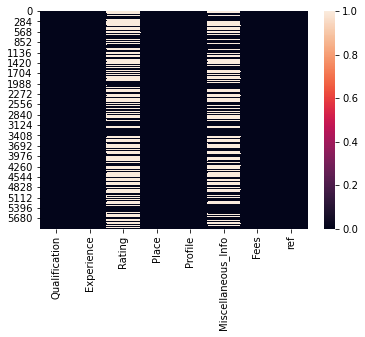

In [56]:
#Uni-variate Analysis
#Check null values in dataset
sns.heatmap(df_train.isnull())
#Null values present in feature "Rating" & "Miscellaneous Info"

Skewness in target variable: 0.7518701683331587


<AxesSubplot:ylabel='Frequency'>

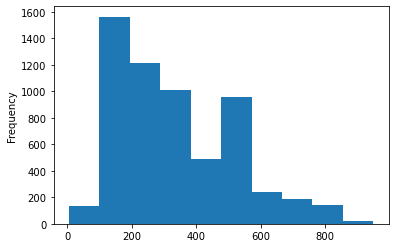

In [57]:
#Skew & Data distribution of target value
print("Skewness in target variable:",df_train["Fees"].skew())
df_train["Fees"].plot.hist()

<AxesSubplot:xlabel='City', ylabel='Fees'>

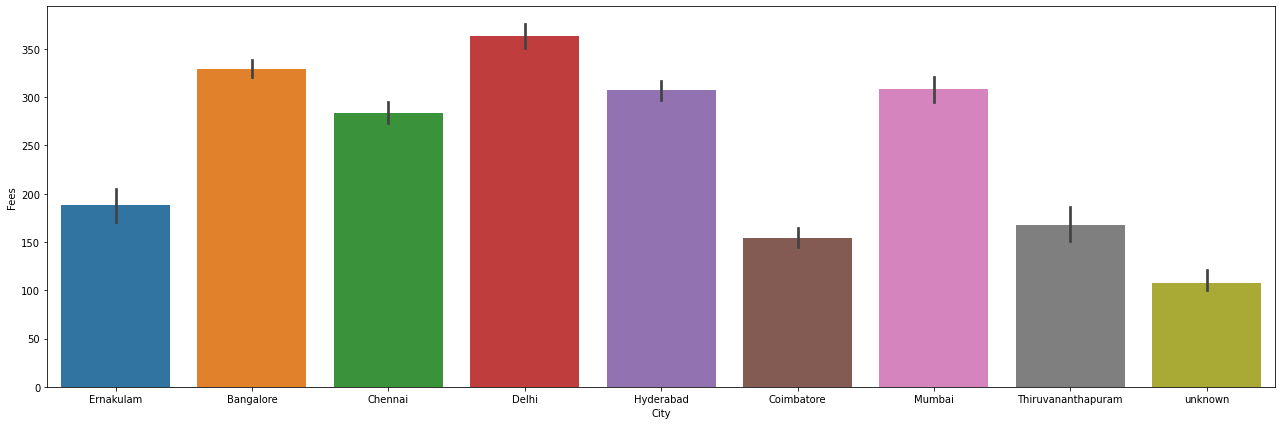

In [58]:
plt.figure(figsize=(22,7))
sns.barplot(x="City",y="Fees",data=df)

In [60]:
#Sort Ratings into ascending order to plot bar graph
x=df["Rating"].sort_values()
x

3973      0.0
4550      0.0
4549      0.0
4548      0.0
4547      0.0
        ...  
6721    100.0
679     100.0
680     100.0
6775    100.0
0       100.0
Name: Rating, Length: 7948, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

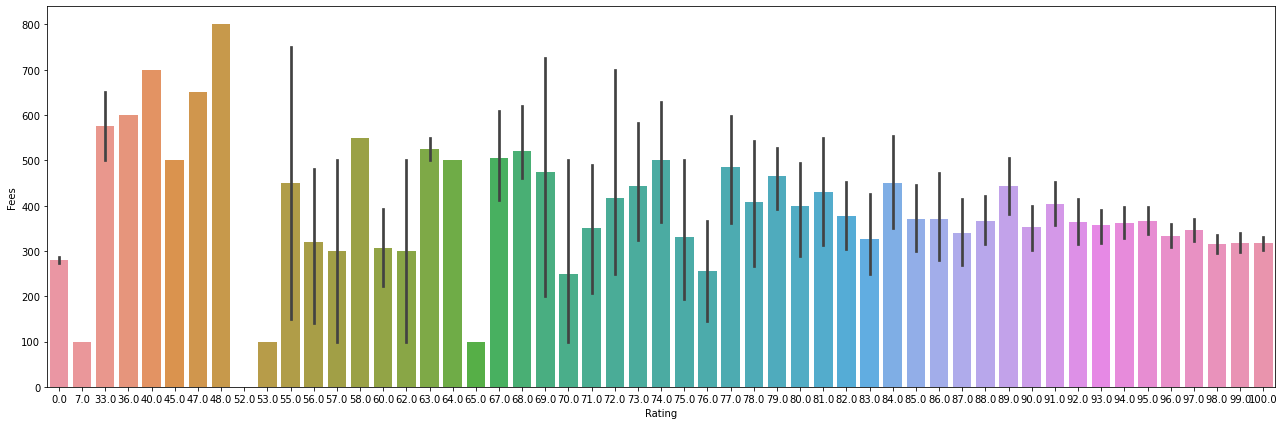

In [61]:
# Plot of Rating vs Fees
plt.figure(figsize=(22,7))
sns.barplot(x=x,y="Fees",data=df)

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

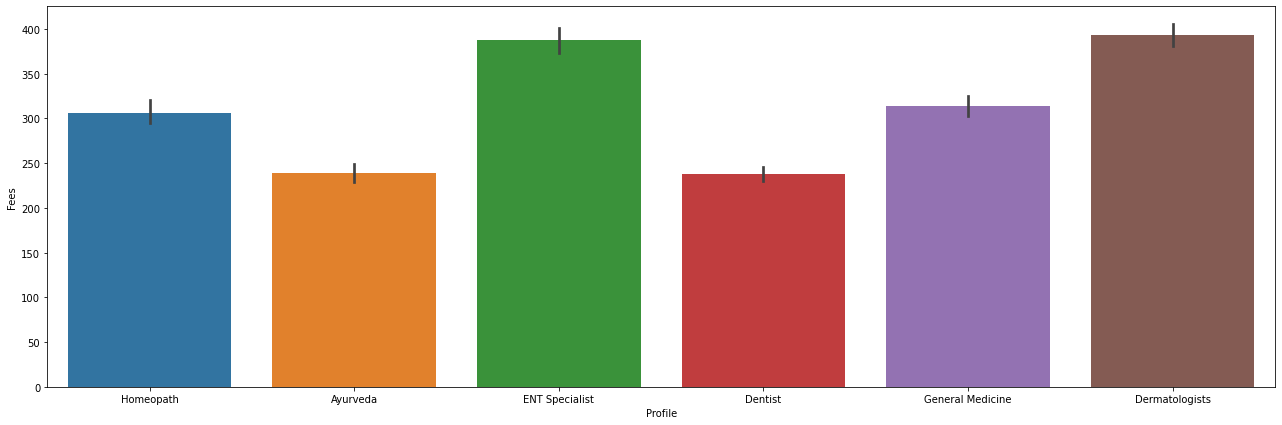

In [62]:
#Check profile vs Fees
plt.figure(figsize=(22,7))
sns.barplot(x="Profile",y="Fees",data=df)

# Data Preprocessing

In [63]:
#Train datset
df_train_final.head()

,Experience,Rating,Profile,Fees,ref,City,UG,PG,PG2,PG3
0,24,100.0,Homeopath,100.0,train,Ernakulam,BHMS,MD - Homeopathy,None,None
1,12,98.0,Ayurveda,350.0,train,Bangalore,BAMS,MD - Ayurveda Medicine,None,None
2,9,0.0,ENT Specialist,300.0,train,Bangalore,MBBS,MS - Otorhinolaryngology,None,None
3,12,0.0,Ayurveda,250.0,train,Bangalore,BSc - Zoology,BAMS,None,None
4,20,100.0,Ayurveda,250.0,train,Chennai,BAMS,None,None,None


In [64]:
#Check shape
df_train_final.shape

(5961, 10)

In [65]:
#Split train data into test & train data set
#Drop ref column as it is not important
df_x=df_train_final.drop(columns=["Fees","ref"])
y=df_train_final["Fees"]
print(df_x.shape,y.shape)

(5961, 8) (5961,)


In [66]:
#Using get dummies convert data to numeric
x=pd.get_dummies(df_x,drop_first=True)

In [67]:
x.shape

(5961, 898)

In [105]:
#COnsidering n_components= 469 to match the test data
from sklearn.decomposition import PCA
pca=PCA(n_components=469)
pc_x=pca.fit_transform(x)

#Information retained in data after dimensionality reduction
print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 99.99799189799027


In [106]:
pc_x.shape

(5961, 469)

# Model Training & Fitting

In [107]:
#Considering RMSLE metrics (Referred Kaggle)
#Split into test & train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pc_x, y,random_state =0,test_size=0.20)
print(x_train.shape,y_train.shape)  
print(x_test.shape,y_test.shape)

(4768, 469) (4768,)
(1193, 469) (1193,)


In [109]:
#Import models 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

#Create instant
knn=KNeighborsRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [110]:
#User defined function to calculate 1-RMSLE
def rmsle(rgr,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =0,test_size=0.20)
    rgr.fit(x_train,y_train)
    y_pred=rgr.predict(x_test)
    r2=mean_squared_log_error(y_test,y_pred)
    print(rgr,1-r2)

In [112]:
#Check 1-RMSLE
for i in (knn,svr,dtr,rfr):
    rmsle(i,pc_x,y)

KNeighborsRegressor() 0.567242270642848
SVR() 0.5490442124122399
DecisionTreeRegressor() 0.2838614972392529
RandomForestRegressor() 0.5618436952368192


In [ ]:
#KNN Regressor & Random forest has the best results

In [114]:
#Check best random state: Considering RMSLE metrics ie (1-RMSLE)
def rmsle(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r=1-mean_squared_log_error(y_test,y_pred)
        if r>max_r_score:
            max_r_score=r
            final_r_state=r_state
    print("max 1-RMSLE score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [113]:
#Hyper parameter tuning (KNN Regressor)
from sklearn.model_selection import GridSearchCV
neighbors={"n_neighbors":range(1,25)}
regr= GridSearchCV(knn,neighbors,cv=5)
regr.fit(pc_x,y)
regr.best_params_

{'n_neighbors': 24}

In [115]:
#KNN Regressor
knn=KNeighborsRegressor(n_neighbors=24)
RMSLE=rmsle(knn,pc_x,y)

max 1-RMSLE score corresponding to  90  is  0.6211838486872296


In [116]:
#Hyper tuning of Random forest regressor using Random search CV
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":[10,100]}
rgr= RandomizedSearchCV(rfr,param_distributions=parameters ,cv=3,n_iter = 10,n_jobs=-1)
rgr.fit(pc_x,y)
rgr.best_params_

{'n_estimators': 100}

In [97]:
#Random forest regressor with best random state
rfr=RandomForestRegressor(n_estimators=100)
rfr_rmsle=rmsle(rfr,pc_x,y)

max 1-RMSLE score corresponding to  63  is  0.5981579641499257


In [ ]:
#KNN regressor is the best model

In [98]:
#Test data
df_test_final

,Experience,Rating,Profile,Fees,ref,City,UG,PG,PG2,PG3
5961,35,0.0,General Medicine,NaN,test,Mumbai,MBBS,None,None,None
5962,31,0.0,ENT Specialist,NaN,test,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),None,None
5963,40,70.0,Dermatologists,NaN,test,Chennai,MBBS,DDVL,None,None
5964,0,0.0,Ayurveda,NaN,test,Delhi,BAMS,None,None,None
5965,16,100.0,Dentist,NaN,test,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,None,None
...,...,...,...,...,...,...,...,...,...,...
7943,10,0.0,Ayurveda,NaN,test,Bangalore,BAMS,Doctor of Medicine,None,None
7944,4,0.0,Dermatologists,NaN,test,Chennai,MD - Dermatology,Venereology & Leprosy,None,None
7945,9,0.0,General Medicine,NaN,test,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,None,None
7946,12,98.0,Dentist,NaN,test,Bangalore,BDS,None,None,None


In [102]:
#Drop fees & ref
test_data=df_test_final.drop(["Fees","ref"],axis=1,inplace=True)

In [103]:
#Using get dummies convert data to numeric
test_data=pd.get_dummies(df_test_final,drop_first=True)
test_data.shape

(1987, 469)

In [117]:
#Predict the Doctor fees by applying model on test data.
doctor_fees_prediction=knn.predict(test_data)

In [119]:
#Saving as Dataframe
doctor_fees_prediction=pd.DataFrame(doctor_fees_prediction,columns=["Fees"])

In [123]:
#Save file in csv format
doctor_fees_prediction.to_csv("doctor_fees_prediction.csv",index=False)